Fuente: https://opendata.euskadi.eus/catalogo/-/indicadores-municipales-de-sostenibilidad-variacion-interanual-en-la-cifra-de-empleo/
Imagen guardada: Araba_Álava_spiral_chart.png


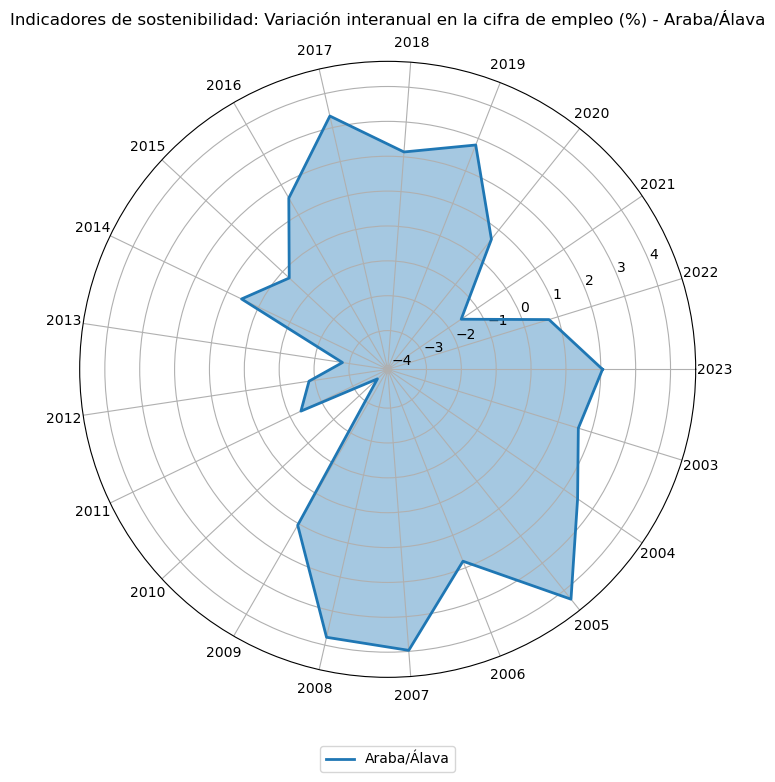

Imagen guardada: Bizkaia_spiral_chart.png


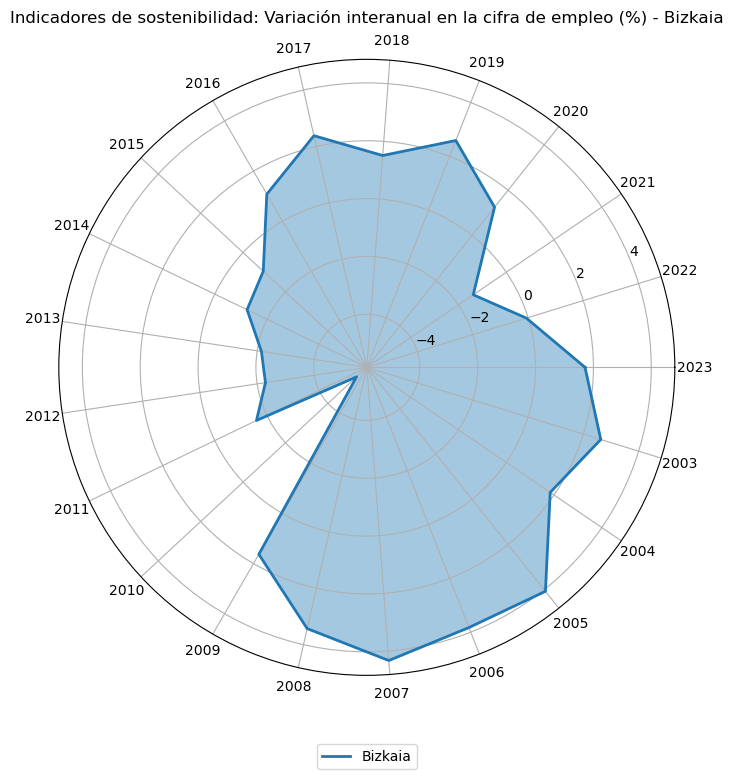

Imagen guardada: Gipuzkoa_spiral_chart.png


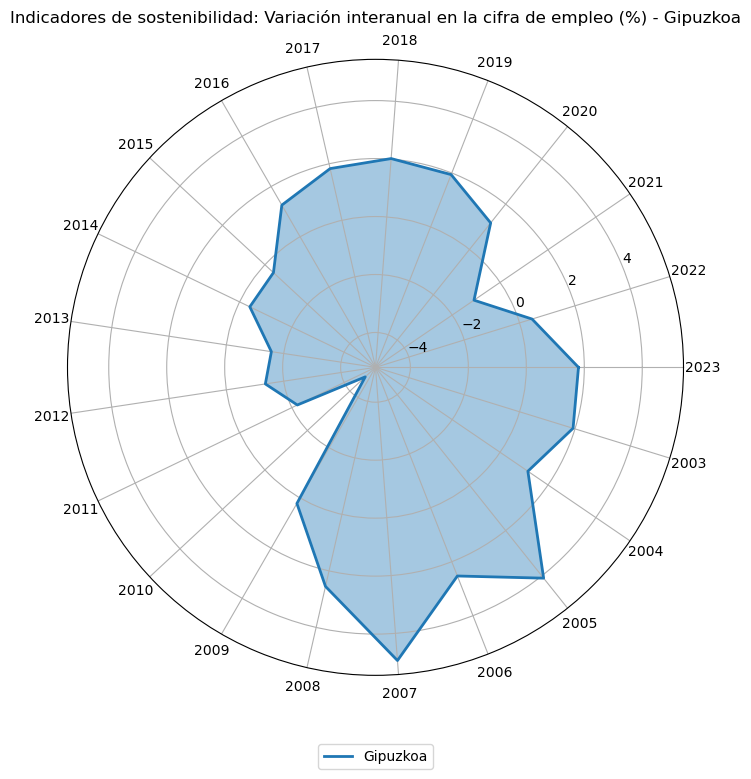

Imagen guardada: combined_spiral_chart.png


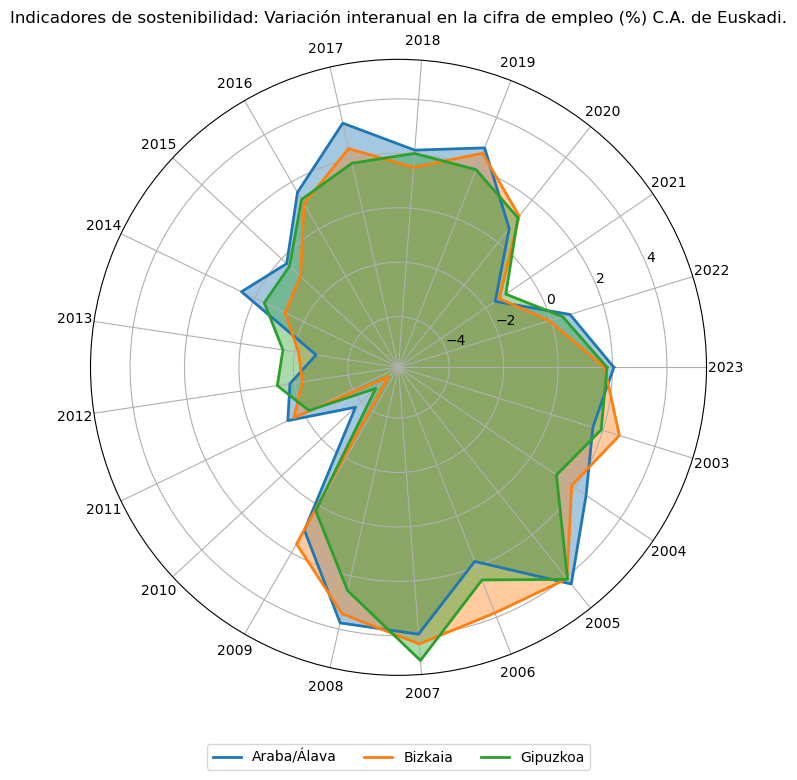

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

data = {
    'Entidad': ['Araba/Álava', 'Bizkaia', 'Gipuzkoa'],
    '2023': [2.05, 1.71, 1.8],
    '2022': [0.73, -0.06, 0.45],
    '2021': [-1.56, -1.38, -1.09],
    '2020': [0.66, 1.25, 1.17],
    '2019': [2.8, 2.59, 1.94],
    '2018': [2.14, 1.51, 2.02],
    '2017': [3.34, 2.38, 1.83],
    '2016': [1.56, 1.08, 1.26],
    '2015': [-0.26, -0.95, -0.4],
    '2014': [0.54, -1.24, -0.39],
    '2013': [-2.8, -2.15, -1.57],
    '2012': [-1.83, -2.29, -1.36],
    '2011': [-1.35, -1.6, -2.21],
    '2010': [-3.71, -5.35, -4.72],
    '2009': [1.05, 1.63, 0.22],
    '2008': [3.77, 3.43, 2.55],
    '2007': [3.97, 4.33, 4.94],
    '2006': [1.8, 3.83, 2.53],
    '2005': [4.32, 4.07, 4.1],
    '2004': [2.48, 1.84, 1.16],
    '2003': [1.61, 2.63, 1.93]
}

df = pd.DataFrame(data).set_index('Entidad').T
df.index = pd.to_datetime(df.index, format='%Y')  # Convertir a fechas

def sanitize_filename(filename):
    return filename.replace('/', '_').replace('\\', '_')

def plot_spiral_chart(entities, title, output_filename):
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    
    for entity in entities:
        values = df[entity].values
        years = df.index.year

        angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
        values = np.append(values, values[0])  # Cerrar el ciclo
        angles = np.append(angles, angles[0])

        ax.plot(angles, values, linewidth=2, linestyle='solid', label=entity)
        ax.fill(angles, values, alpha=0.4)

    # Configurar etiquetas de año alrededor del espiral
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(years, fontsize=10)
    ax.set_title(title, va='bottom', fontsize=12)

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=10)

    plt.savefig(output_filename, bbox_inches='tight')
    print(f"Imagen guardada: {output_filename}")

    plt.show()
    plt.close()

print('Fuente: https://opendata.euskadi.eus/catalogo/-/indicadores-municipales-de-sostenibilidad-variacion-interanual-en-la-cifra-de-empleo/')

for entity in ['Araba/Álava', 'Bizkaia', 'Gipuzkoa']:
    sanitized_name = sanitize_filename(entity)
    plot_spiral_chart([entity], f"Indicadores de sostenibilidad: Variación interanual en la cifra de empleo (%) - {entity}", f"{sanitized_name}_spiral_chart.png")

plot_spiral_chart(['Araba/Álava', 'Bizkaia', 'Gipuzkoa'], "Indicadores de sostenibilidad: Variación interanual en la cifra de empleo (%) C.A. de Euskadi.", "combined_spiral_chart.png")
